<a href="https://colab.research.google.com/github/AKSeavey/4_Tree-Based-Methods/blob/main/project_4_Tree_Based_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
spotify = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/project_4/Spotify.csv", index_col = 0)

### Data Overview

In [ ]:
spotify.head().T

Index,1,2,3,4,5
Highest Charting Position,1,2,1,3,5
Number of Times Charted,8,3,11,5,1
Week of Highest Charting,2021-07-23--2021-07-30,2021-07-23--2021-07-30,2021-06-25--2021-07-02,2021-07-02--2021-07-09,2021-07-23--2021-07-30
Song Name,Beggin',STAY (with Justin Bieber),good 4 u,Bad Habits,INDUSTRY BABY (feat. Jack Harlow)
Streams,"48,633,449","47,248,719","40,162,559","37,799,456","33,948,454"
Artist,Måneskin,The Kid LAROI,Olivia Rodrigo,Ed Sheeran,Lil Nas X
Artist Followers,3377762,2230022,6266514,83293380,5473565
Song ID,3Wrjm47oTz2sjIgck11l5e,5HCyWlXZPP0y6Gqq8TgA20,4ZtFanR9U6ndgddUvNcjcG,6PQ88X9TkUIAUIZJHW2upE,27NovPIUIRrOZoCHxABJwK
Genre,"['indie rock italiano', 'italian pop']",['australian hip hop'],['pop'],"['pop', 'uk pop']","['lgbtq+ hip hop', 'pop rap']"
Release Date,2017-12-08,2021-07-09,2021-05-21,2021-06-25,2021-07-23


In [ ]:
spotify.shape

(1556, 22)

In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 1 to 1556
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Highest Charting Position  1556 non-null   int64 
 1   Number of Times Charted    1556 non-null   int64 
 2   Week of Highest Charting   1556 non-null   object
 3   Song Name                  1556 non-null   object
 4   Streams                    1556 non-null   object
 5   Artist                     1556 non-null   object
 6   Artist Followers           1556 non-null   object
 7   Song ID                    1556 non-null   object
 8   Genre                      1556 non-null   object
 9   Release Date               1556 non-null   object
 10  Weeks Charted              1556 non-null   object
 11  Popularity                 1556 non-null   object
 12  Danceability               1556 non-null   object
 13  Energy                     1556 non-null   object
 14  Loudness

### Data Cleaning

In [ ]:
print(spotify.columns)

Index(['Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')


In [ ]:
spotify_clean = spotify.copy()

In [ ]:
spotify_clean.head().T

Index,1,2,3,4,5
Highest Charting Position,1,2,1,3,5
Number of Times Charted,8,3,11,5,1
Week of Highest Charting,2021-07-23--2021-07-30,2021-07-23--2021-07-30,2021-06-25--2021-07-02,2021-07-02--2021-07-09,2021-07-23--2021-07-30
Song Name,Beggin',STAY (with Justin Bieber),good 4 u,Bad Habits,INDUSTRY BABY (feat. Jack Harlow)
Streams,"48,633,449","47,248,719","40,162,559","37,799,456","33,948,454"
Artist,Måneskin,The Kid LAROI,Olivia Rodrigo,Ed Sheeran,Lil Nas X
Artist Followers,3377762,2230022,6266514,83293380,5473565
Song ID,3Wrjm47oTz2sjIgck11l5e,5HCyWlXZPP0y6Gqq8TgA20,4ZtFanR9U6ndgddUvNcjcG,6PQ88X9TkUIAUIZJHW2upE,27NovPIUIRrOZoCHxABJwK
Genre,"['indie rock italiano', 'italian pop']",['australian hip hop'],['pop'],"['pop', 'uk pop']","['lgbtq+ hip hop', 'pop rap']"
Release Date,2017-12-08,2021-07-09,2021-05-21,2021-06-25,2021-07-23


In [ ]:
spotify_clean['Streams'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1556 entries, 1 to 1556
Series name: Streams
Non-Null Count  Dtype 
--------------  ----- 
1556 non-null   object
dtypes: object(1)
memory usage: 24.3+ KB


In [ ]:
spotify_clean['Streams'] = spotify_clean['Streams'].str.replace(',', '').astype(float)

# stream_obj = spotify_clean['Streams']
# stream_float = float(stream_obj)
# stream_float

In [ ]:
spotify_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 1 to 1556
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1556 non-null   int64  
 1   Number of Times Charted    1556 non-null   int64  
 2   Week of Highest Charting   1556 non-null   object 
 3   Song Name                  1556 non-null   object 
 4   Streams                    1556 non-null   float64
 5   Artist                     1556 non-null   object 
 6   Artist Followers           1556 non-null   object 
 7   Song ID                    1556 non-null   object 
 8   Genre                      1556 non-null   object 
 9   Release Date               1556 non-null   object 
 10  Weeks Charted              1556 non-null   object 
 11  Popularity                 1556 non-null   object 
 12  Danceability               1556 non-null   object 
 13  Energy                     1556 non-null   objec

In [ ]:
# RECREATE DATA FRAME, RUN ONCE, LOOK AT NAN, LOOK AT SAME ROW AND THEN SEE WHAT HAPPENS
# run cell twice to get all nulls... weird!
# object to numeric transformation for Dtype object
obj_to_num_columns = ['Artist Followers',
                      'Popularity',
                      'Danceability',
                      'Energy',
                      'Loudness',
                      'Speechiness',
                      'Acousticness',
                      'Liveness',
                      'Tempo',
                      'Duration (ms)',
                      'Valence', ]

spotify_clean[obj_to_num_columns] = spotify_clean[obj_to_num_columns]\
    .apply(pd.to_numeric, errors='coerce')\
    .fillna(spotify_clean[obj_to_num_columns].mean(numeric_only=True))

spotify_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 1 to 1556
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1556 non-null   int64  
 1   Number of Times Charted    1556 non-null   int64  
 2   Week of Highest Charting   1556 non-null   object 
 3   Song Name                  1556 non-null   object 
 4   Streams                    1556 non-null   float64
 5   Artist                     1556 non-null   object 
 6   Artist Followers           1556 non-null   float64
 7   Song ID                    1556 non-null   object 
 8   Genre                      1556 non-null   object 
 9   Release Date               1556 non-null   object 
 10  Weeks Charted              1556 non-null   object 
 11  Popularity                 1556 non-null   float64
 12  Danceability               1556 non-null   float64
 13  Energy                     1556 non-null   float

In [ ]:
# null_rows = spotify_clean[spotify_clean['Loudness'].isnull()]
# null_rows

In [ ]:
# null_test = null_rows.loc[36]
# null_test

In [ ]:
spotify_clean['Popularity'].value_counts()

75.0    67
76.0    66
72.0    64
77.0    62
80.0    58
        ..
38.0     1
46.0     1
97.0     1
98.0     1
3.0      1
Name: Popularity, Length: 70, dtype: int64

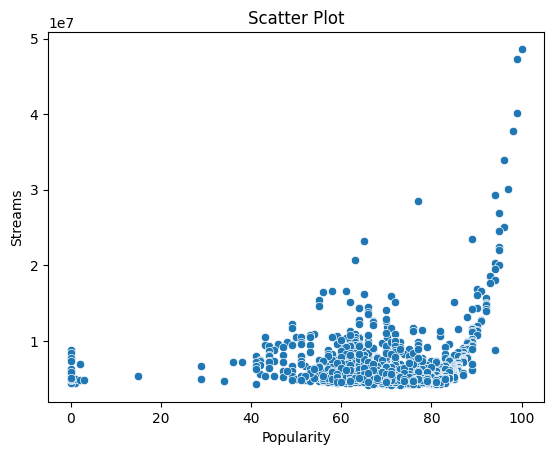

In [ ]:
x = spotify_clean['Popularity']
y = spotify_clean['Streams']
sns.scatterplot(x=x, y=y)

# Add labels and title
plt.xlabel("Popularity")
plt.ylabel("Streams")
plt.title("Scatter Plot")

# Display the plot
plt.show()

In [ ]:
label_encoder = LabelEncoder()
spotify_clean['Genre_Encoded'] = label_encoder.fit_transform(spotify_clean['Genre'])

In [ ]:
spotify_clean['Genre_Encoded'].value_counts()

394    75
178    71
312    63
361    57
318    33
       ..
387     1
195     1
190     1
5       1
240     1
Name: Genre_Encoded, Length: 395, dtype: int64

In [ ]:
# genre looks like nested list...
# explode/squash list and then encode
# skip until later iteration
spotify_clean[['Genre_Encoded', 'Genre']].head(20)

,Genre_Encoded,Genre
Index,,
1,277,"['indie rock italiano', 'italian pop']"
2,64,['australian hip hop']
3,365,['pop']
4,364,"['pop', 'uk pop']"
5,313,"['lgbtq+ hip hop', 'pop rap']"
6,313,"['lgbtq+ hip hop', 'pop rap']"
7,181,"['dance pop', 'pop']"
8,366,"['puerto rican pop', 'trap latino']"
9,312,"['latin', 'reggaeton', 'trap latino']"


In [ ]:
columns_to_drop = [
    'Week of Highest Charting',
    'Highest Charting Position',
    'Weeks Charted',
    'Song Name',
    'Artist',
    'Song ID',
    'Chord',
    'Danceability',
    'Loudness',
    'Speechiness',
    'Acousticness',
    'Liveness',
    'Energy',
    'Tempo',
    'Duration (ms)',
    'Valence',
    'Genre',
]

In [ ]:
spotify_clean.drop(columns=columns_to_drop, inplace=True)

In [ ]:
spotify_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 1 to 1556
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number of Times Charted  1556 non-null   int64  
 1   Streams                  1556 non-null   float64
 2   Artist Followers         1556 non-null   float64
 3   Release Date             1556 non-null   object 
 4   Popularity               1556 non-null   float64
 5   Genre_Encoded            1556 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.1+ KB


In [ ]:
spotify_clean['Release Date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1556 entries, 1 to 1556
Series name: Release Date
Non-Null Count  Dtype 
--------------  ----- 
1556 non-null   object
dtypes: object(1)
memory usage: 24.3+ KB


In [ ]:
# Extract relevant components
spotify_clean['Release Date'] = pd.to_datetime(spotify_clean['Release Date'], errors='coerce')

In [ ]:
# Option 3: Convert to categorical variables
spotify_clean['Weekend'] = spotify_clean['Release Date'].dt.dayofweek.isin([5, 6])  # Weekend: True/False
# spotify_clean['Holiday'] = spotify_clean['Date'].isin(['2021-12-25', '2022-01-01'])  # Example holiday dates

In [ ]:
spotify_clean['Weekend'].value_counts()

False    1479
True       77
Name: Weekend, dtype: int64

In [ ]:
spotify_clean = spotify_clean.drop('Release Date', axis=1)
spotify_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 1 to 1556
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number of Times Charted  1556 non-null   int64  
 1   Streams                  1556 non-null   float64
 2   Artist Followers         1556 non-null   float64
 3   Popularity               1556 non-null   float64
 4   Genre_Encoded            1556 non-null   int64  
 5   Weekend                  1556 non-null   bool   
dtypes: bool(1), float64(3), int64(2)
memory usage: 74.5 KB


In [ ]:
spotify_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 1 to 1556
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number of Times Charted  1556 non-null   int64  
 1   Streams                  1556 non-null   float64
 2   Artist Followers         1556 non-null   float64
 3   Popularity               1556 non-null   float64
 4   Genre_Encoded            1556 non-null   int64  
 5   Weekend                  1556 non-null   bool   
dtypes: bool(1), float64(3), int64(2)
memory usage: 74.5 KB


### Decision Tree

In [ ]:
X = spotify_clean.drop('Popularity', axis = 1)
y = spotify_clean['Popularity']

In [ ]:
#Selected features based on XG boost best parameters

numLoops = 500

rms_error = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = DecisionTreeRegressor(max_depth=3) # Arbitrarily choosing max_depth of 3
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

# something is fishy here: [deleted *1000]
print(f"CV RMSE: {rms_error.mean().round(2)}")


CV RMSE: 9.17


In [ ]:
# try other targets!!

In [ ]:
# rando forest: try feature importance from this - feed back into tree model

In [ ]:
# think like a tree - see below yaml
# one thought is to start w/ numerical since it's easier to plug in
# below tool for prioritization


Given a table of data, how many ... ?

```yaml
columns:
  feature columns:
    rows with nulls in each:
  target columns:
    rows with nulls in each:
  categorical columns:
    nominal columns:
      rows with nulls in each:
      categories in each:
    ordinal columns:
      rows with nulls in each:
      categories in each:
  numerical columns:
    discreet columns:
      rows with nulls in each:
    continuous columns:
      rows with nulls in each:
  nested columns:
rows:
  rows with nulls:
  duplicate rows:
  missing rows:
```



